### Quantum SVM (variational method)
This notebook shows the SVM implementation based on the variational method.

first, we do some import work


In [1]:
import paths
import os
import sys
from algorithm_svm_datasets import *
from qiskit_acqua.svm.data_preprocess import *
from qiskit_acqua.input import get_input_instance
from qiskit_acqua import run_algorithm

now, we prepare the dataset, which is used for training, testing and prediction afterwards.
You can easily switch to a different dataset such as the Breast Cancer dataset by replacing 'ad_hoc_data' to 'Breast_cancer' below.

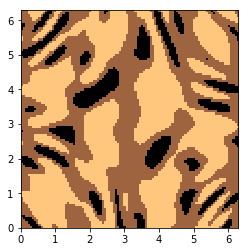

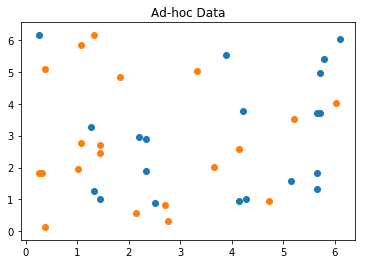

In [2]:
num_of_qubits=2
sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=20, test_size=10, n=num_of_qubits, gap=0.3, PLOT_DATA=True)
total_array, label_to_labelclass = get_points(test_input, class_labels)

we initialize the necessary inputs: the input dictionary (params) and the input object (algo_input).

In [3]:

params = {
    'problem': {'name': 'svm_classification'},
    'backend': {'name': 'local_qasm_simulator', 'shots':1000},
    'algorithm': {
        'name': 'SVM_Variational',
        'num_of_qubits': num_of_qubits,
        'circuit_depth':3,
        'max_trials':100  #critical!!!  ideal: >200
    }
}

algo_input = get_input_instance('SVMInput')
algo_input.training_dataset  = training_input
algo_input.test_dataset = test_input
algo_input.datapoints = total_array

since everything is setup, let us run the algorithm.

for the testing, the result includes the details and the success ratio.

for the prediction, the result includes the predicted labels.

In [4]:
result = run_algorithm(params,algo_input)
print(result)



Classifying point [1.0681415  4.64955713]. Label should be  A 

Measured label probability distribution is {'A': 0.7889999999999999, 'B': 0.211} 

Assigned label is  A  CORRECT 



Classifying point [0.75398224 1.69646003]. Label should be  A 

Measured label probability distribution is {'A': 0.848, 'B': 0.152} 

Assigned label is  A  CORRECT 



Classifying point [5.59203492 3.14159265]. Label should be  A 

Measured label probability distribution is {'A': 0.911, 'B': 0.08900000000000001} 

Assigned label is  A  CORRECT 



Classifying point [1.00530965 4.64955713]. Label should be  A 

Measured label probability distribution is {'A': 0.772, 'B': 0.228} 

Assigned label is  A  CORRECT 



Classifying point [5.34070751 2.89026524]. Label should be  A 

Measured label probability distribution is {'A': 0.8140000000000001, 'B': 0.186} 

Assigned label is  A  CORRECT 



Classifying point [1.88495559 0.62831853]. Label should be  A 

Measured label probability distribution is {'A': 0.637